# SMS Spam Ham Classification Project using NLP Techniques and Machine Learning Algorithms

## Part-1 Bag of words and TF-IDF

### EDA

#### Loading the Data

In [1]:
import pandas as pd 
import re

In [2]:
messages = pd.read_csv(r"smsspamcollection\SMSSpamCollection",sep= "\t",names=["label","message"])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.shape

(5572, 2)

In [5]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
messages.drop_duplicates(inplace=True)
messages.reset_index(drop=True,inplace=True)

<Axes: >

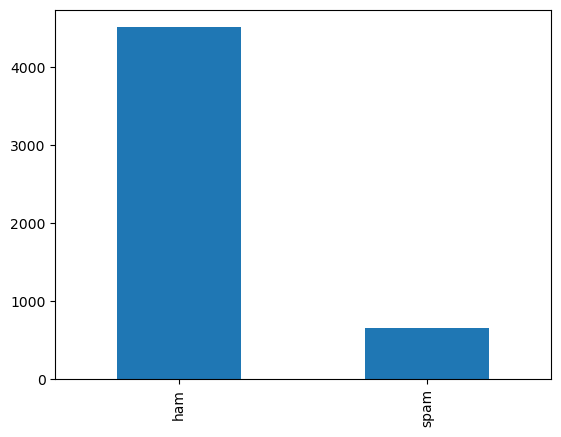

In [7]:
messages["label"].value_counts().plot(kind="bar")

* Though the classes are imbalanced, we will not be using resampling techniques for now. Using SMOTE on text data after TF-IDF or BoW is not going to be useful as it produces a sparse matrix, so we cannot replicate a message in between like we do in numeric data and hence it might generate wrong or noisy samples. 

* Therefore, we will adjust it using the class imbalance handling in Logistic Regression, and for Naive Bayes, we will think about it later after considering the precision and recall scores."

### Text Processing

In [8]:
import nltk
# nltk.download("stopwords") only needed if you dont downloaded it already

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [10]:
len(messages)

5169

In [11]:
messages["message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5164    This is the 2nd time we have tried 2 contact u...
5165                 Will ü b going to esplanade fr home?
5166    Pity, * was in mood for that. So...any other s...
5167    The guy did some bitching but I acted like i'd...
5168                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

we can shorten the below text preprocessing step using simplepreprocess which we will see in part-2 while we are applying wored2vec

In [12]:
corpus = []
stopwords = set(stopwords.words("english"))

for i in range(len(messages)):
    retext = re.sub("[^a-zA-Z]"," ",messages["message"][i])
    retext = retext.lower()
    words = retext.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
    cleaned_text = " ".join(words)
    corpus.append(cleaned_text)


In [13]:
corpus[:5] # this is nothing but our independent variable X

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

#### Segregating independent and dependent variables

In [14]:
# when we convert out label into one hot encoded columns we can retain any one of the column so her i am retaining
# spam column if there is 0 then it means the sms is spam and if it is 0 then is ham or not a spam
y = pd.get_dummies(messages["label"])["spam"]

#### spliting the dataset into train and test data:

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

X_train ,X_test,y_train,y_test = train_test_split(corpus, y, test_size= 0.3, random_state= 3)

#### Vectorization (Word Embeddings).

#### 1) Bag of words:

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2000,ngram_range=(1,3),) # here i am saying need top 2000 features and i should consider
                                                           # unigram, bigram and trigram

when we are performing the text processing techniques while creating the corpus we may lose some row because of empty spaces
so it is always good to know wheather the train and test data on X and y are in same length

In [17]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

3618 3618 1551 1551


In [18]:
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

In [19]:
X_train_cv # we have uses normal bow so we will get frequency of occuring in the array 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
print(X_train_cv.shape)
print(X_test_cv.shape)


(3618, 2000)
(1551, 2000)


In [21]:
cv.vocabulary_ # now you can see we have taken words with 1 word to 3 word combination for max_features

{'get': 635,
 'pic': 1278,
 'msg': 1130,
 'phone': 1276,
 'number': 1202,
 'done': 449,
 'sorry': 1574,
 'hope': 788,
 'next': 1175,
 'give': 648,
 'everything': 522,
 'want': 1868,
 'remember': 1403,
 'around': 67,
 'move': 1121,
 'leave': 928,
 'key': 879,
 'thanx': 1694,
 'lot': 988,
 'yup': 1999,
 'wun': 1959,
 'believe': 130,
 'wat': 1877,
 'really': 1387,
 'neva': 1165,
 'sent': 1498,
 'shuhui': 1524,
 'lady': 889,
 'street': 1621,
 'sheet': 1509,
 'hello': 757,
 'site': 1539,
 'download': 457,
 'song': 1568,
 'urgent': 1817,
 'pls': 1299,
 'read': 1383,
 'twice': 1770,
 'people': 1265,
 'spend': 1591,
 'time': 1716,
 'money': 1111,
 'spent': 1592,
 'good': 672,
 'morning': 1114,
 'keep': 873,
 'smiling': 1557,
 'good morning': 680,
 'someone': 1563,
 'smoke': 1558,
 'every': 514,
 'last': 900,
 'two': 1771,
 'week': 1897,
 'calling': 226,
 'texting': 1687,
 'wanted': 1873,
 'every time': 515,
 'dun': 473,
 'thk': 1705,
 'told': 1731,
 'nothing': 1195,
 'making': 1029,
 'sure': 1

#### 2) TF- IDF Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000,ngram_range=(1,3))

In [23]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [24]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(3618, 2000)
(1551, 2000)


In [26]:
tfidf.vocabulary_

{'get': 635,
 'pic': 1278,
 'msg': 1130,
 'phone': 1276,
 'number': 1202,
 'done': 449,
 'sorry': 1574,
 'hope': 788,
 'next': 1175,
 'give': 648,
 'everything': 522,
 'want': 1868,
 'remember': 1403,
 'around': 67,
 'move': 1121,
 'leave': 928,
 'key': 879,
 'thanx': 1694,
 'lot': 988,
 'yup': 1999,
 'wun': 1959,
 'believe': 130,
 'wat': 1877,
 'really': 1387,
 'neva': 1165,
 'sent': 1498,
 'shuhui': 1524,
 'lady': 889,
 'street': 1621,
 'sheet': 1509,
 'hello': 757,
 'site': 1539,
 'download': 457,
 'song': 1568,
 'urgent': 1817,
 'pls': 1299,
 'read': 1383,
 'twice': 1770,
 'people': 1265,
 'spend': 1591,
 'time': 1716,
 'money': 1111,
 'spent': 1592,
 'good': 672,
 'morning': 1114,
 'keep': 873,
 'smiling': 1557,
 'good morning': 680,
 'someone': 1563,
 'smoke': 1558,
 'every': 514,
 'last': 900,
 'two': 1771,
 'week': 1897,
 'calling': 226,
 'texting': 1687,
 'wanted': 1873,
 'every time': 515,
 'dun': 473,
 'thk': 1705,
 'told': 1731,
 'nothing': 1195,
 'making': 1029,
 'sure': 1

### Model Building:

* we all start with general classification model logistic regression which defines the decision boundary between classes so we are also going to start with the same.

* we know naive bayes works well with text data where we use vectorization methods like TFIDF and BOW which depends on the frequency of text occurring so we use naive bayes.

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight= "balanced")

#### Logistic regression on Bag of words(cv):


In [28]:
log_reg.fit(X_train_cv,y_train)
y_pred = log_reg.predict(X_test_cv)

In [29]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9780786589297228


In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1373
           1       0.89      0.93      0.91       178

    accuracy                           0.98      1551
   macro avg       0.94      0.96      0.95      1551
weighted avg       0.98      0.98      0.98      1551



#### Logistic regression on TF-IDF:


In [31]:
log_reg.fit(X_train_tfidf,y_train)
y_pred = log_reg.predict(X_test_tfidf)

In [32]:
print(accuracy_score(y_test,y_pred))

0.9780786589297228


In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1357
           1       0.93      0.89      0.91       194

    accuracy                           0.98      1551
   macro avg       0.96      0.94      0.95      1551
weighted avg       0.98      0.98      0.98      1551



#### Naive Bayes 

#### Naive Bayes on Bag of words(cv)

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()

In [35]:
nb.fit(X_train_cv,y_train)
y_pred = nb.predict(X_test_cv)

In [36]:
print(accuracy_score(y_test,y_pred))

0.9832366215344939


In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1373
           1       0.91      0.95      0.93       178

    accuracy                           0.98      1551
   macro avg       0.95      0.97      0.96      1551
weighted avg       0.98      0.98      0.98      1551



#### Naive Bayes on TFIDF:

In [38]:
nb.fit(X_train_tfidf,y_train)
y_pred = nb.predict(X_test_tfidf)

In [39]:
print(accuracy_score(y_test,y_pred))

0.9774339136041263


In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1396
           1       0.82      0.99      0.90       155

    accuracy                           0.98      1551
   macro avg       0.91      0.98      0.94      1551
weighted avg       0.98      0.98      0.98      1551



* on the above results, we can see that Multinomial Naive Bayes using Bag of Words (CountVectorizer) vectorization performs better on the SMS Spam-Ham classification task, achieving an accuracy of 98.32%, along with strong precision and recall metrics. 
* specifically, a precision and recall of 0.99 for the ham class and 0.91 precision and 0.95 recall for the spam class.

I have skipped the feature engineering as there is only 1 feature, but it is highly recommended. I built this project to practice the NLP concepts which I have learned.

## Part-2 Word2vec and Avgword2vec

#### This is just the continuation of above Part-1 except we use **Word2Vec** for creating the word embeddings, where there will be a slight change in our **text processing**.

### Text Processing

In [ ]:
#!pip install gensim

In [121]:
messages.shape

(5169, 2)

In [122]:
from gensim.models import Word2Vec,KeyedVectors

simple_preprocess will ease our code where it will create list of tokens by taking a sentence or document and lowercase it 
it also removes punctuation marks and non alphabets

In [ ]:
from gensim.utils import simple_preprocess

In [124]:
empty_indices = [] #for tracking the indices where our message in corpus is empty 
corpus = []

for i in range(0, len(messages)):
    #review = re.sub("[^a-zA-z]"," ",messages["message"][i])
    #review =review.lower()
    #review = review.split()
    review = simple_preprocess(messages["message"][i])
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    if review.strip() == "":
        empty_indices.append(i)
    else:
        corpus.append(review)

In [125]:
empty_indices

[1561, 3193, 4021, 4502, 4820]

In [126]:
words = []

from nltk import sent_tokenize

for sent in corpus:
    words.append(simple_preprocess(sent))

In [127]:
corpus[:5]

['go until jurong point crazy available only in bugis great world la buffet cine there got amore wat',
 'ok lar joking wif oni',
 'free entry in wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate apply over',
 'dun say so early hor already then say',
 'nah don think he go to usf he life around here though']

In [128]:
words[:3]

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over']]

In [129]:
print(len(corpus))
print(len(words))

5164
5164


### Vectorization - Training our own word2vec using gensim 

since our corpus is small we will not remove stopwords we will be training deafult word2vec where there will be 100 dimensions and 5 epochs

In [130]:
import gensim
wv_model = gensim.models.Word2Vec(words)

In [131]:
wv_model.wv.index_to_key[:10]

['you', 'to', 'the', 'and', 'it', 'in', 'is', 'me', 'my', 'for']

In [132]:
wv_model.corpus_count

5164

In [133]:
wv_model.epochs

5

In [134]:
wv_model.wv.most_similar("morning")

[('night', 0.9993362426757812),
 ('today', 0.9992061853408813),
 ('good', 0.9991238117218018),
 ('them', 0.9990876913070679),
 ('give', 0.9990751147270203),
 ('sorry', 0.9990680813789368),
 ('very', 0.9990679025650024),
 ('wa', 0.999050498008728),
 ('money', 0.9990424513816833),
 ('here', 0.9990323781967163)]

In [135]:
wv_model.wv["morning"].shape

(100,)

We will now create AVGword2vec because we want to represent fr each message in 100 dimensions rather than each words in 100 dimensions

tqdm displays the progress bar so that we could know the status of our avgword2vec process it will be helpful while training word2vec on larger corpus 

In [136]:
# !pip install tqdm

In [137]:
import numpy as np
def avgword2vec(document):
    return np.mean([wv_model.wv[word] for word in document if word in wv_model.wv.index_to_key],axis =0)

In [138]:
from tqdm import tqdm

X = []

for i in tqdm(range(len(words))):
    X.append(avgword2vec(words[i]))


  0%|          | 0/5164 [00:00<?, ?it/s]c:\Users\SA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\SA\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5164/5164 [00:00<00:00, 6767.21it/s]


In [141]:
X[0]

array([-1.37038574e-01,  2.94929951e-01, -2.60431692e-02,  3.96791957e-02,
        7.91931525e-02, -4.91065562e-01,  1.05624087e-01,  5.98818421e-01,
       -2.07696125e-01, -2.16737673e-01, -1.15174361e-01, -3.57608676e-01,
       -9.10031423e-02,  1.24712579e-01,  1.16599798e-01, -1.82135537e-01,
        4.04968932e-02, -3.08557451e-01, -7.44874850e-02, -5.39693594e-01,
        1.77226394e-01,  4.84014899e-02,  1.07822068e-01, -2.32445061e-01,
       -5.76726757e-02,  6.60499632e-02, -2.22718388e-01, -2.29759797e-01,
       -2.22636625e-01,  3.98541316e-02,  2.24300712e-01,  6.73786155e-04,
        6.26101345e-02, -2.86290795e-01, -1.93007171e-01,  3.56187791e-01,
       -4.36147712e-02, -1.54783219e-01, -1.53768718e-01, -4.43764538e-01,
        4.78935987e-02, -2.34040797e-01, -8.81711096e-02,  2.60392260e-02,
        2.07284957e-01, -7.50860870e-02, -2.09199026e-01, -1.40707389e-01,
        1.60761580e-01,  7.38467425e-02,  1.29295513e-01, -2.06211567e-01,
       -7.90158287e-02,  

In [140]:
X[0].shape

(100,)

### Independent and dependent features

Now after applying our AvgWord2Vec, we can represent each message in 100 dimensions. But currently, it is in rows, whereas we know that when we say "dimensions", they should be represented in columns, where each record or row represents a message. So, we will reshape it and add it to the DataFrame.

In [143]:
X[0].reshape(1,-1).shape

(1, 100)

In [144]:
df=pd.DataFrame()

for i in range(0,len(X)):
    df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)

C:\Users\SA\AppData\Local\Temp\ipykernel_11648\1177391832.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)


In [145]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.137039,0.294930,-0.026043,0.039679,0.079193,-0.491066,0.105624,0.598818,-0.207696,-0.216738,...,0.322805,0.259525,0.039056,0.028379,0.378959,0.297046,0.174794,-0.195128,0.123446,0.049665
1,-0.114499,0.249373,-0.022151,0.031091,0.074356,-0.423710,0.094398,0.523384,-0.179684,-0.178965,...,0.280251,0.224353,0.031616,0.029129,0.337401,0.259927,0.146782,-0.177532,0.103008,0.041583
2,-0.137433,0.314455,-0.033190,0.031741,0.075751,-0.512493,0.095331,0.603407,-0.191813,-0.217171,...,0.318940,0.257011,0.051214,0.024395,0.350683,0.291157,0.204639,-0.194610,0.131429,0.056346
3,-0.178595,0.392678,-0.028988,0.063799,0.109593,-0.652590,0.153713,0.813442,-0.291737,-0.286192,...,0.441517,0.350482,0.048586,0.036184,0.537553,0.405355,0.222565,-0.268923,0.167509,0.069828
4,-0.158768,0.340132,-0.021166,0.051257,0.099469,-0.565739,0.134347,0.698158,-0.246178,-0.251585,...,0.377010,0.304348,0.045797,0.028894,0.455705,0.345923,0.199871,-0.232006,0.145611,0.055304


In [146]:
df.shape

(5164, 100)

In [147]:
messages.drop(index=empty_indices,inplace=True)
messages.reset_index(drop=True,inplace=True)

In [148]:
y = pd.get_dummies(messages["label"])["spam"]

In [149]:
df["spam"] = y

In [150]:
df.dropna(inplace=True)

In [151]:
X = df.iloc[ : , :-1]
y = df["spam"]

In [152]:
print(X.shape)
print(y.shape)

(5154, 100)
(5154,)


### Model Building

We will be applying Logistic Regression and Random Forest Classifier. Naive Bayes is not suitable in this case because it expects the input features to be non-negative, which is not guaranteed after applying Word2Vec or AvgWord2Vec, as the embeddings can contain negative values.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state= 3)

#### Logistic Regression on Average word2vec:

In [159]:
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [160]:
y_pred = log_reg.predict(X_test)

In [161]:
print(accuracy_score(y_test,y_pred))

0.9256625727213963


In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1356
           1       0.64      0.90      0.75       191

    accuracy                           0.93      1547
   macro avg       0.81      0.91      0.85      1547
weighted avg       0.94      0.93      0.93      1547



#### Random Forest classifier on Average word2vec:

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=3)

In [155]:
rfcl.fit(X_train,y_train)

RandomForestClassifier(random_state=3)

In [156]:
y_pred = rfcl.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9644473173884939


In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1356
           1       0.88      0.83      0.85       191

    accuracy                           0.96      1547
   macro avg       0.93      0.91      0.92      1547
weighted avg       0.96      0.96      0.96      1547



### Model Evaluation Summary

By above results we can clearly see:

- We are getting good results by using **Random Forest Classifier** on the **AvgWord2Vec** than the **Logistic Regression**, where:
  - Accuracy is **93%**
  - Precision and Recall for spam class is **64%** and **90%**
  - Precision and Recall for ham class is **99%** and **93%**

- But still, for the **Random Forest Classifier**:
  - Accuracy: **96%**
  - Precision and Recall for spam class is **88%** and **83%**
  - Precision and Recall for ham class is **98%** and **98%**

- Though our accuracy is more or like similar, the **Naive Bayes** on **Bag of Words** gives the **best result** with:
  - Accuracy of **98.32%**
  - Precision and Recall for ham class is **91%** and **95%** 
  - Precision and Recall for ham class is **99%** and **99%**
